In [14]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [15]:
data=pd.read_csv('C://Users//admin//Downloads//Indicators.csv')
data.shape


(5656458, 6)

In [17]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [19]:
countries=data['CountryName'].unique().tolist()#tolist=converts data into list
len(countries)

247

In [20]:
countrycodes=data['CountryCode'].unique().tolist()
len(countrycodes)

247

In [22]:
indicators=data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [23]:
years=data['Year'].unique().tolist()
len(years)

56

In [24]:
print(str(min(years)),"to",str(max(years)))

1960 to 2015


#Basic plotting, part1 

In [34]:
#select co2 emission for the united states
hist_indicator='CO2 emissions \(metric'
hist_country='USA'
mask1=data['IndicatorName'].str.contains(hist_indicator)
mask2=data['CountryCode'].str.contains(hist_country)
#stage is just those indicators matching USA for country code and Co2 emission
stage=data[mask1 & mask2]
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


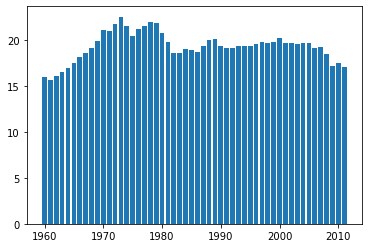

In [35]:
years=stage['Year'].values
co2=stage['Value'].values
#create
plt.bar(years,co2)
plt.show()

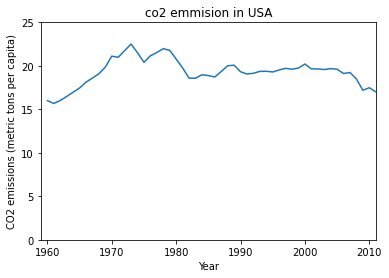

In [36]:
#switch to a line plot
plt.plot(stage['Year'].values,stage['Value'].values)
#label the axis
plt.xlabel("Year")
plt.ylabel(stage['IndicatorName'].iloc[0])
#label the fig
plt.title('co2 emmision in USA')
#to make more honest, start they y axis at 0
plt.axis([1959,2011,0,25])
plt.show()

In [37]:
hist_data=stage['Value'].values
print(len(hist_data))

52


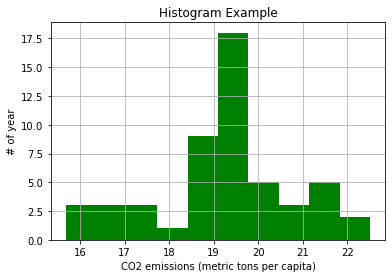

In [52]:
plt.hist(hist_data,10,density=False,facecolor='green')
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of year')
plt.title('Histogram Example')
plt.grid(True)
plt.show()

In [54]:
hist_indicator='CO2 emissions \(metric'
hist_year=2011
mask1=data['IndicatorName'].str.contains(hist_indicator)
mask2=data['Year'].isin([hist_year])
co2_2011=data[mask1&mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


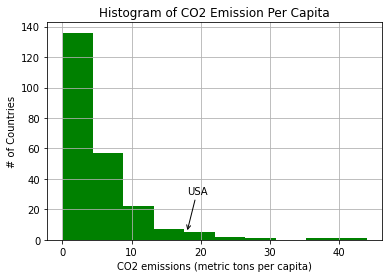

In [58]:
#subplots return a touple with figure, axis attributes.
fig, ax =plt.subplots()
ax.annotate("USA",
           xy=(18,5),xycoords='data',
           xytext=(18,30), textcoords='data',
           arrowprops=dict(arrowstyle="->",
                          connectionstyle="arc3"),
           )
plt.hist(co2_2011['Value'],10,density=False,facecolor='green')
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emission Per Capita')
#plot.axis([10,22,0,14])
plt.grid(True)
plt.show()

Relationship between GDP and CO2 Emission in USA

In [59]:
# select GDP PEr capita emission for the United States
hist_indicator='GDP per capita \(constant 2005'
hist_country='USA'
mask1=data['IndicatorName'].str.contains(hist_indicator)
mask2=data['CountryCode'].isin([hist_country])
#stage is just those indicators matching the USA for country code and co2 emission over time

gdp_stage=data[mask1&mask2]

In [60]:
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


In [61]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [62]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


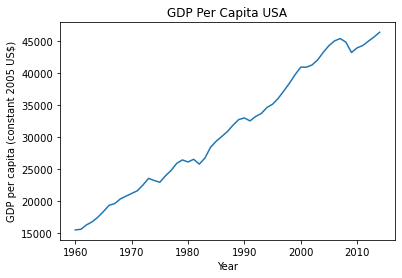

In [63]:
plt.plot(gdp_stage['Year'].values,gdp_stage['Value'].values)
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])
plt.title('GDP Per Capita USA')
plt.show()
           

In [64]:
print("GDP Min Year= ",gdp_stage['Year'].min(),"max:",gdp_stage['Year'].max())
print("CO2 Min Year= ", stage['Year'].min(),"max:",stage['Year'].max())


GDP Min Year=  1960 max: 2014
CO2 Min Year=  1960 max: 2011


In [65]:
#We have 3 extra years of GDP data, so lets trim those off so the scatterplot has equal lenght arrays to compare( this is actually reqired bu scatterplot)
gdp_stage_trunc=gdp_stage[gdp_stage['Year']<2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


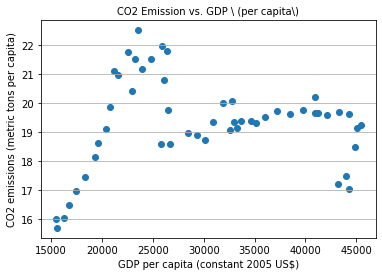

In [66]:
fig,axis=plt.subplots()
axis.yaxis.grid(True)
axis.set_title('CO2 Emission vs. GDP \ (per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc["IndicatorName"].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)
X=gdp_stage_trunc["Value"]
Y=stage['Value']
axis.scatter(X,Y)
plt.show()

In [69]:
#This doesnt look like a strong relatiohship. We can test this by looking at correlation.
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])